In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

sns.set(style="whitegrid")
%matplotlib inline

In [3]:
train = pd.read_csv("/home/vincent/Desktop/train.csv")
#test = pd.read_csv("/home/vincent/Desktop/test.csv")

In [4]:
train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


# var3: nationality of the customer

In [5]:
# Top-10 most common values
# 116 values in column var3 are -999999
# var3 is suspected to be the nationality of the customer
# -999999 would mean that the nationality of the customer is unknown
train.var3.value_counts()[:10]

 2         74165
 8           138
-999999      116
 9           110
 3           108
 1           105
 13           98
 7            97
 4            86
 12           85
Name: var3, dtype: int64

In [6]:
# Replace -999999 in var3 column with most common value 2 
train = train.replace(-999999, value=2)

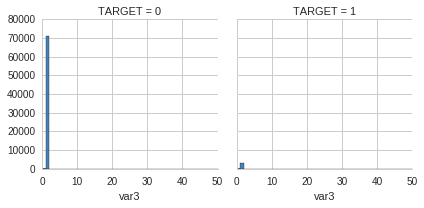

var3 == 2占整个样本的比例为 : 97.71%


In [7]:
g = sns.FacetGrid(train, col="TARGET", margin_titles=True)
bins = np.linspace(0, 50, 50)
g.map(plt.hist, "var3", color="steelblue", bins=bins)
plt.show()
print('var3 == 2占整个样本的比例为 : {:.2%}'.format(train.loc[train.var3 == 2].shape[0] / train.shape[0]))

从上面显示的结果我们可以看到var3 == 2几近占据了全部的样本，并且基本上全在类别0中，表面上看起来var3具有很强的预测能力。

In [8]:
# happy customers have TARGET==0, unhappy custormers have TARGET==1
# A little less then 4% are unhappy => unbalanced dataset
df = pd.DataFrame(train.TARGET.value_counts())
df['Percentage'] = 100*df['TARGET']/train.shape[0]
df

,TARGET,Percentage
0,73012,96.043147
1,3008,3.956853


从上表统计的数据来看，类别1连4%都不到，这说明类别是严重偏斜的，因此var3并没有很强的预测能力。

# Add feature that counts the number of zeros in a row

In [9]:
X = train.iloc[:, : - 1]
y = train.TARGET

X['n0'] = (X == 0).sum(axis = 1)
train['n0'] = X['n0']

# num_var4 : number of bank products

In [10]:
num_var4_value_counts = train.num_var4.value_counts()
num_var4_value_counts

1    38147
0    19528
2    12692
3     4377
4     1031
5      203
6       36
7        6
Name: num_var4, dtype: int64

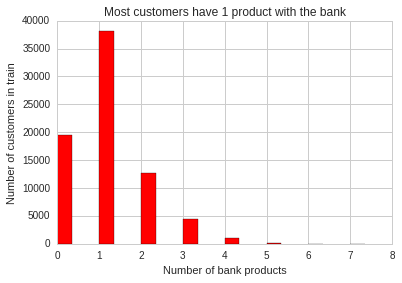

In [11]:
ind, counts = np.unique(train.num_var4, return_counts=True)

p1 = plt.bar(ind, counts, 0.35, color='r')
plt.xlabel('Number of bank products')
plt.ylabel('Number of customers in train')
plt.title('Most customers have 1 product with the bank')
plt.show()

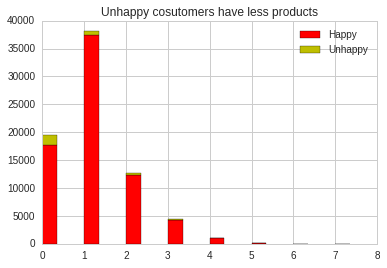

In [12]:
ind0, counts0 = np.unique(train.loc[train.TARGET == 0].num_var4, return_counts=True)
ind1, counts1 = np.unique(train.loc[train.TARGET == 1].num_var4, return_counts=True)
counts1 = np.append(counts1, [0, 0])
width = 0.35

p1 = plt.bar(ind0, counts0, width, color='r')
p2 = plt.bar(ind0, counts1, width, color='y', bottom=counts0)

plt.title('Unhappy cosutomers have less products')
plt.legend((p1[0], p2[0]), ('Happy', 'Unhappy'))

plt.show()

虽然整个数据集中Unhappy的用户连4%都不到，但是从上图我们可以看出，Unhappy的用户大部分都集中在num_var4变量为0或1的地方。

# Var38

In [13]:
train.var38.value_counts().head(15)

117310.979016    14868
451931.220000       16
463625.160000       12
104563.800000       11
288997.440000       11
236690.340000        8
67088.310000         7
128318.520000        7
329603.970000        7
125722.440000        7
104644.410000        7
70813.800000         6
163432.470000        6
105260.880000        6
97639.560000         6
Name: var38, dtype: int64

从上面的统计信息可以看出，Var38变量其中的一个值数量非常多，其它值的数量大约都在20以下。下面，我plot出直方图，看看var38变量的分布是什么样的？

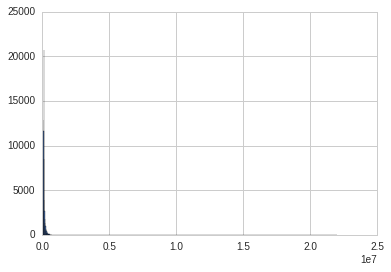

In [14]:
train.var38.hist(bins=1000)
plt.show()

从上图可以看出,var38变量的分布是positive skew, 这个变量很有可能是和金钱相关的。下面，我用log转换一下它的分布，看看是什么样的？

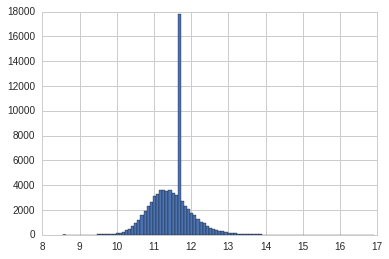

In [15]:
train.var38.map(np.log).hist(bins=100)
plt.show()

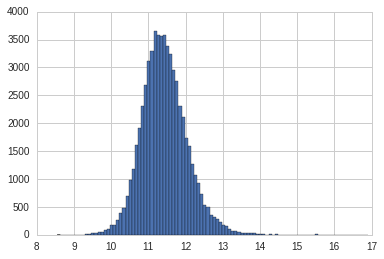

In [16]:
# 这次我们去掉上图中那个数量非常多的值
train.loc[~np.isclose(train.var38, 117310.979016), 'var38'].map(np.log).hist(bins=100)
plt.show()

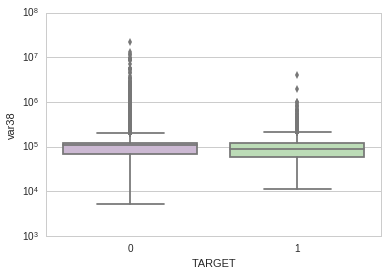

In [65]:
ax = sns.boxplot(x="TARGET", y="var38", data=train, palette="PRGn")
ax.set_yscale("log", nonposy='clip')
plt.show()

从上面的boxplot可以看出，var38并没有对response有很大的预测能力，因为对于两个类别来说，变量var38基本上分布保持一致。

# var15

The most important feature for XGBoost is var15. According to [a Kaggle form post](https://www.kaggle.com/c/santander-customer-satisfaction/forums/t/19291/data-dictionary/110414#post110414) var15 is the age of the customer.

In [67]:
train.var15.value_counts().head(10)

23    20170
24     6232
25     4217
26     3270
27     2861
28     2173
31     1798
29     1727
30     1640
32     1592
Name: var15, dtype: int64

In [68]:
train.var15.describe()

count    76020.000000
mean        33.212865
std         12.956486
min          5.000000
25%         23.000000
50%         28.000000
75%         40.000000
max        105.000000
Name: var15, dtype: float64

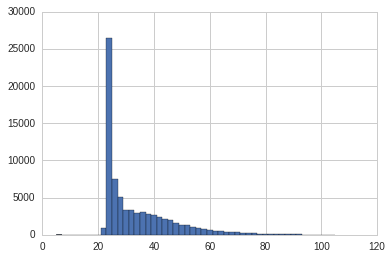

In [80]:
train.var15.hist(bins=50)

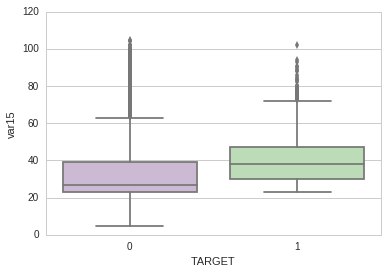

In [76]:
sns.boxplot(x="TARGET", y="var15", data=train, palette="PRGn")

**从上图可以看出，这个变量很重要，它的预测能力比上面其它变量要强**, 如果这个变量真的代表年龄，那么上图说明年长的更有可能Unhappy.

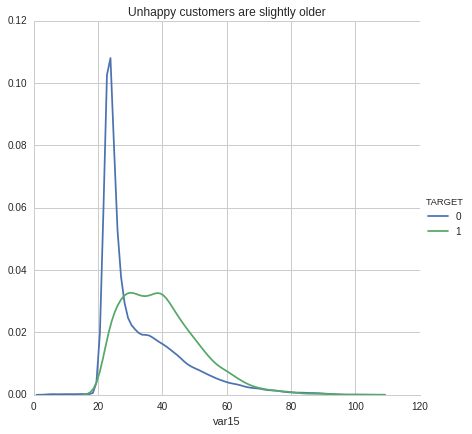

In [81]:
# Let's look at the density of the age of happy/unhappy customers
sns.FacetGrid(train, hue="TARGET", size=6) \
   .map(sns.kdeplot, "var15") \
   .add_legend()
plt.title('Unhappy customers are slightly older');

# saldo_var30

In [88]:
train.saldo_var30.value_counts().head(10)

0.0      20310
3.0      18290
90.0      5236
30.0      1603
15.0      1477
6.0        926
150.0      823
60.0       686
300.0      400
120.0      305
Name: saldo_var30, dtype: int64

In [93]:
train.saldo_var30.describe()

count    7.602000e+04
mean     1.367967e+04
std      6.301408e+04
min     -4.942260e+03
25%      0.000000e+00
50%      3.000000e+00
75%      2.359950e+02
max      3.458077e+06
Name: saldo_var30, dtype: float64

In [108]:
train.loc[train.saldo_var30 < 0, 'saldo_var30'].shape

(120,)

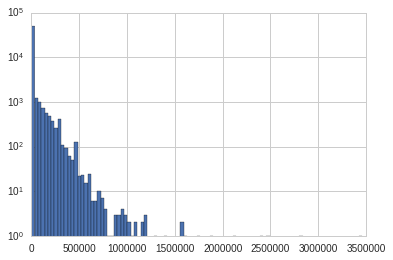

In [100]:
# 因为用log绽放y-axis，我先把小于0的数据去掉
ax = train.loc[train.saldo_var30 > 0, 'saldo_var30'].hist(bins=100)
ax.set_yscale('log')

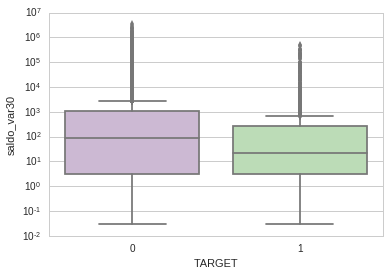

In [102]:
ax = sns.boxplot(x="TARGET", y="saldo_var30", data=train.loc[train.saldo_var30 > 0, :], palette="PRGn")
ax.set_yscale("log", nonposy='clip')

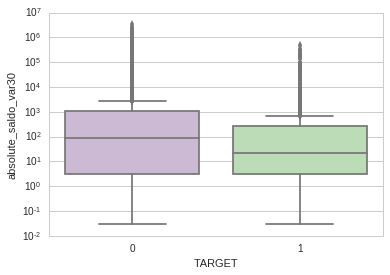

In [107]:
# 把小于0的值用绝对值
train['absolute_saldo_var30'] = np.absolute(train.saldo_var30)
ax = sns.boxplot(x="TARGET", y="absolute_saldo_var30", data=train.loc[train.saldo_var30 > 0, :], palette="PRGn")
ax.set_yscale("log", nonposy='clip')

看来无论是去掉小于0的值还是用绝对值处理，两个boxplot基本上没什么区别，因为saldo_var30变量小于0的样本只有120个。看起来变量saldo_var30也没有很强的预测能力。

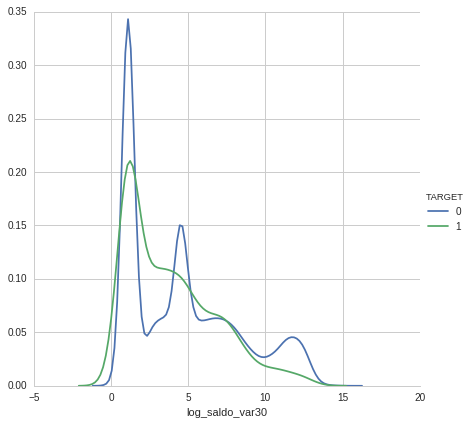

In [137]:
# improve the plot by making the x axis logarithmic
train['log_saldo_var30'] = train.loc[train.saldo_var30 > 1, 'saldo_var30'].map(np.log)
# Let's look at the density of the age of happy/unhappy customers for saldo_var30
sns.FacetGrid(train, hue="TARGET", size=6) \
   .map(sns.kdeplot, "log_saldo_var30") \
   .add_legend()

# Explore the interaction between var15 (age) and var38

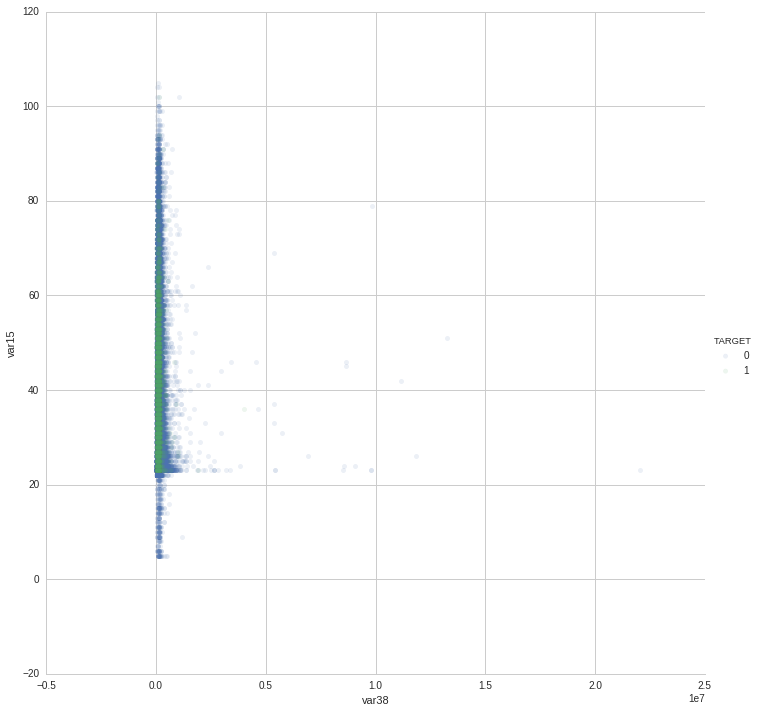

In [141]:
sns.FacetGrid(train, hue="TARGET", size=10) \
   .map(plt.scatter, "var38", "var15", alpha = 0.1) \
   .add_legend()

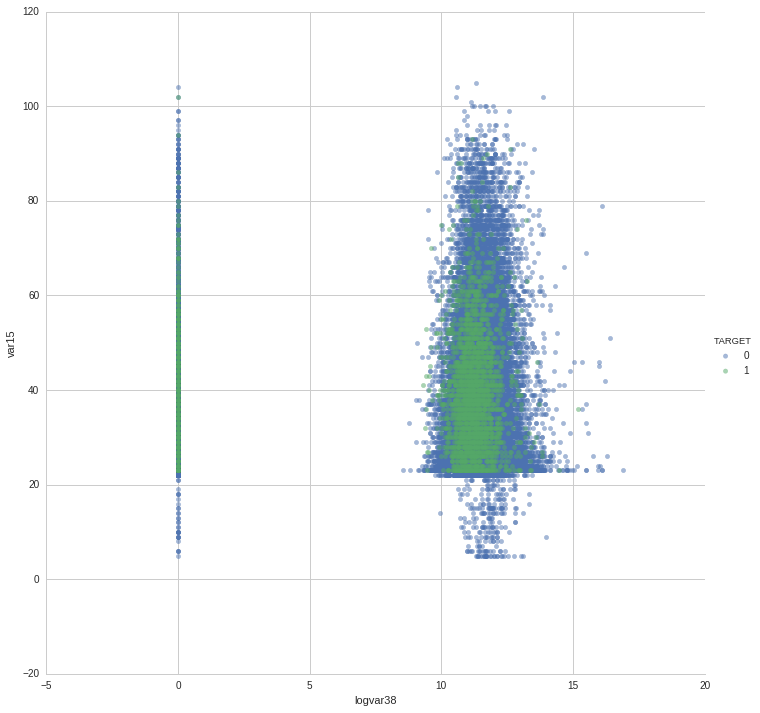

In [144]:
sns.FacetGrid(train, hue="TARGET", size=10) \
   .map(plt.scatter, "logvar38", "var15", alpha = 0.5) \
   .add_legend()

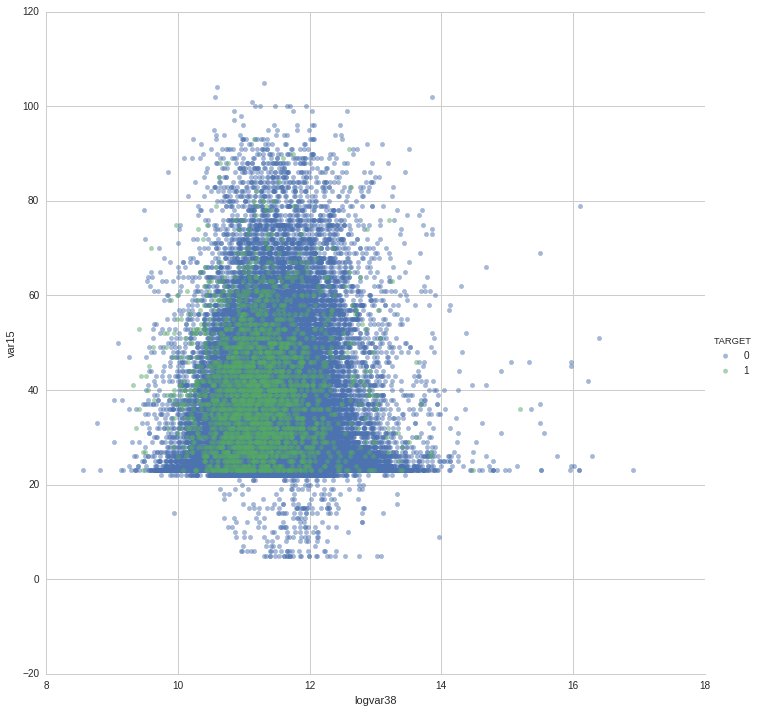

In [147]:
train['var38mc'] = np.isclose(train.var38, 117310.979016)
# Exclude most common value for var38 
sns.FacetGrid(train[~train.var38mc], hue="TARGET", size=10) \
   .map(plt.scatter, "logvar38", "var15", alpha=0.5) \
   .add_legend()

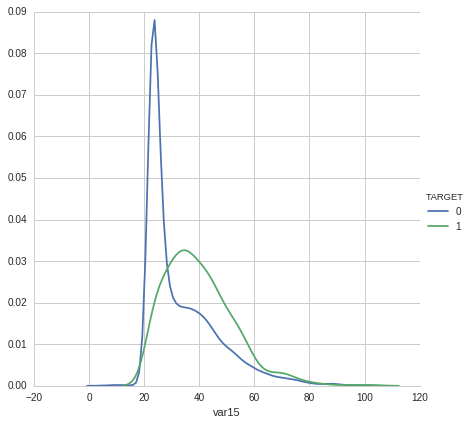

In [148]:
# What is distribution of the age when var38 has it's most common value ?
sns.FacetGrid(train[train.var38mc], hue="TARGET", size=6) \
   .map(sns.kdeplot, "var15") \
   .add_legend()

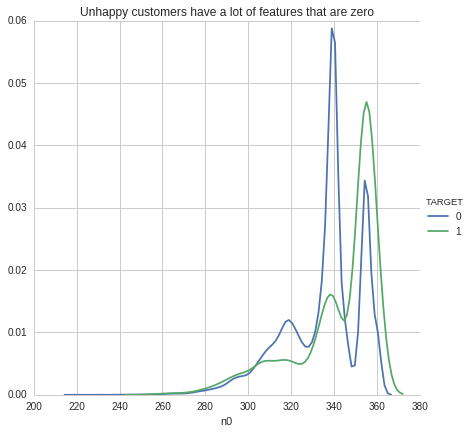

In [150]:
# What is density of n0 ?
sns.FacetGrid(train, hue="TARGET", size=6) \
   .map(sns.kdeplot, "n0") \
   .add_legend()
plt.title('Unhappy customers have a lot of features that are zero');

# Select the most important features

# var36

In [153]:
train.var36.value_counts()

99    30064
3     22177
1     14664
2      8704
0       411
Name: var36, dtype: int64

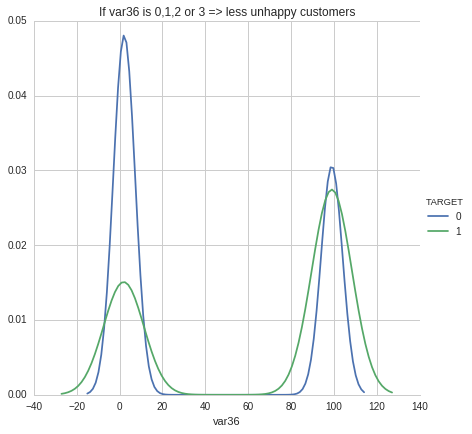

In [175]:
# Let's plot the density in function of the target variabele
sns.FacetGrid(train, hue="TARGET", size=6) \
   .map(sns.kdeplot, "var36") \
   .add_legend()
plt.title('If var36 is 0,1,2 or 3 => less unhappy customers');

变量var36 = 99时，更有可能出现客户Unhappy. 换一种角度思考，Unhappy的用户连4%都不到，而当变量var36 = 99时，Unhapp和Happy的用户density基本差不多，这说明var36 = 99时，客户Unhappy的可能非常大，Happy的可能非常小， 因此**这是一个很有预测力量的变量。**

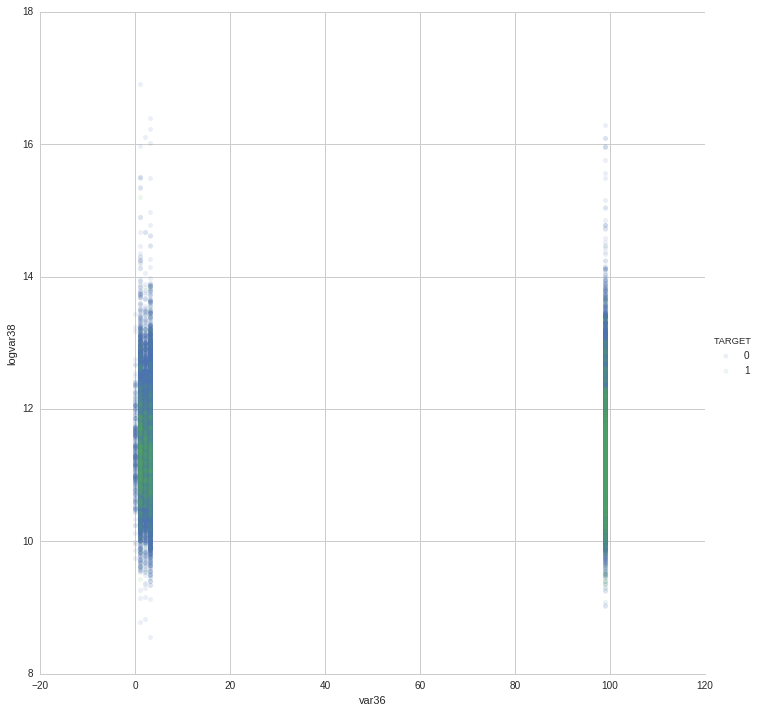

In [190]:
train['logvar38'] = train.loc[~train['var38mc'], 'var38'].map(np.log)
train.loc[train['var38mc'], 'logvar38'] = 0
# var36 in function of var38 (most common value excluded) 
sns.FacetGrid(train[~train.var38mc], hue="TARGET", size=10) \
   .map(plt.scatter, "var36", "logvar38", alpha=0.1) \
   .add_legend()

现在，我把上面的plot用变量var36分开, 一个是var36 != 99, 一个是var36 == 99.

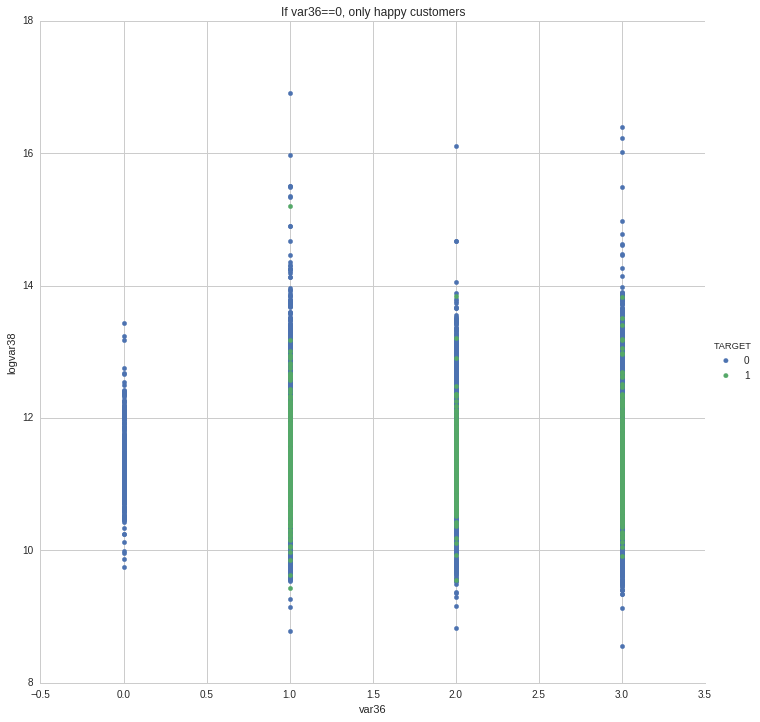

In [193]:
sns.FacetGrid(train[(~train.var38mc) & (train.var36 != 99)], hue="TARGET", size=10) \
   .map(plt.scatter, "var36", "logvar38") \
   .add_legend()

plt.title('If var36==0, only happy customers')

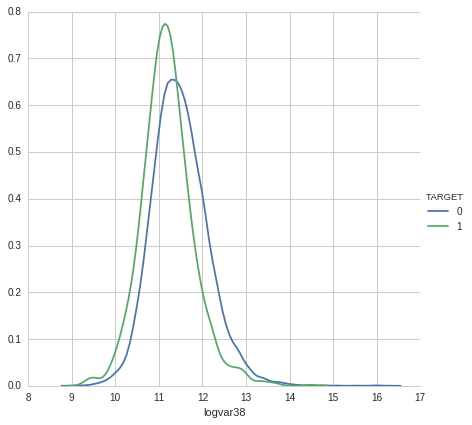

In [194]:
# Let's plot the density in function of the target variabele, when var36 = 99
sns.FacetGrid(train[(~train.var38mc) & (train.var36 == 99)], hue="TARGET", size=6) \
   .map(sns.kdeplot, "logvar38") \
   .add_legend()

# num_var5

In [195]:
train.num_var5.value_counts()

3     50265
0     25561
6       190
9         3
15        1
Name: num_var5, dtype: int64

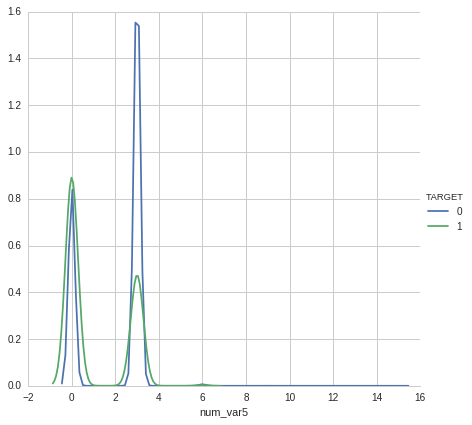

In [196]:
sns.FacetGrid(train, hue="TARGET", size=6) \
   .map(sns.kdeplot, "num_var5") \
   .add_legend()

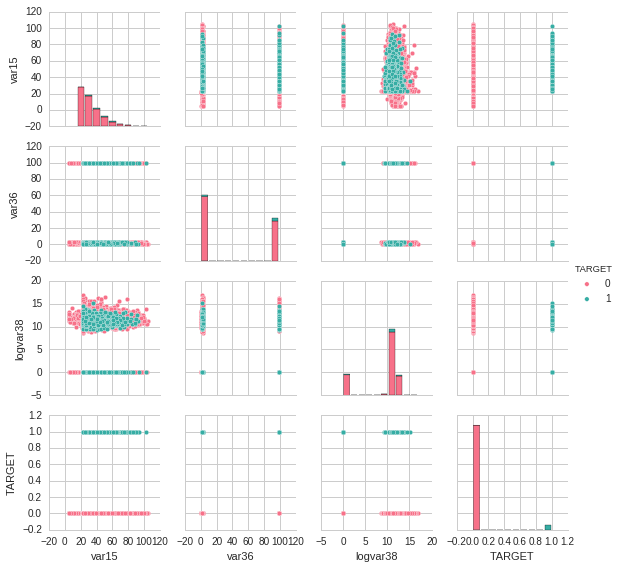

In [204]:
sns.pairplot(train[['var15','var36','logvar38','TARGET']], hue="TARGET", palette="husl", size=2, diag_kind='hist')